In [3]:
import pandas as pd
df=pd.read_csv(r'C:\dataset\weatherData\weather_data.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head(4)

,City,Date,Temperature (C),Feels Like (C),Humidity (%),Pressure (hPa),Weather Description,Wind Speed (m/s),Cloudiness (%),Rain (1h mm),Sunrise,Sunset
0,Delhi,1979-01-01 00:00:00,9.26,7.33,28,1086,clear,2.42,0,3.91,1979-01-01 06:29:00,1979-01-01 18:31:00
1,Delhi,1979-01-01 00:01:00,14.96,15.25,68,930,cold,1.23,49,5.16,1979-01-01 06:30:00,1979-01-01 18:31:00
2,Delhi,1979-01-01 00:02:00,3.93,2.00,33,990,windy,0.57,33,5.16,1979-01-01 06:28:00,1979-01-01 18:28:00
3,Delhi,1979-01-01 00:03:00,11.46,10.71,35,1034,windy,3.55,48,0.60,1979-01-01 06:32:00,1979-01-01 18:32:00


In [6]:
print(df.dtypes)

City                           object
Date                   datetime64[ns]
Temperature (C)               float64
Feels Like (C)                float64
Humidity (%)                    int64
Pressure (hPa)                  int64
Weather Description            object
Wind Speed (m/s)              float64
Cloudiness (%)                  int64
Rain (1h mm)                  float64
Sunrise                        object
Sunset                         object
dtype: object


In [7]:
df=df.set_index('Date')
df.head(4)

,City,Temperature (C),Feels Like (C),Humidity (%),Pressure (hPa),Weather Description,Wind Speed (m/s),Cloudiness (%),Rain (1h mm),Sunrise,Sunset
Date,,,,,,,,,,,
1979-01-01 00:00:00,Delhi,9.26,7.33,28,1086,clear,2.42,0,3.91,1979-01-01 06:29:00,1979-01-01 18:31:00
1979-01-01 00:01:00,Delhi,14.96,15.25,68,930,cold,1.23,49,5.16,1979-01-01 06:30:00,1979-01-01 18:31:00
1979-01-01 00:02:00,Delhi,3.93,2.00,33,990,windy,0.57,33,5.16,1979-01-01 06:28:00,1979-01-01 18:28:00
1979-01-01 00:03:00,Delhi,11.46,10.71,35,1034,windy,3.55,48,0.60,1979-01-01 06:32:00,1979-01-01 18:32:00


In [8]:
df=df.resample('D').mean()

C:\Users\cks12\AppData\Local\Temp\ipykernel_9736\563895720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('D').mean()


In [9]:
trainDF=df["2023-01-01":"2024-07-31"][['Temperature (C)']]
trainDF.head(4)

,Temperature (C)
Date,
2023-01-01,13.646854
2023-01-02,13.356340
2023-01-03,13.531757
2023-01-04,13.592799


In [10]:
validDF=df["2024-08-01":"2024-12-31"][['Temperature (C)']]
validDF.tail(4)

,Temperature (C)
Date,
2024-10-31,30.015104
2024-11-01,13.248139
2024-11-02,13.851750
2024-11-03,13.363451


In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
length=30
batch_size=1
generator=TimeseriesGenerator(trainDF.to_numpy(),trainDF.to_numpy(),length=length,batch_size=batch_size)


In [13]:
v_generator=TimeseriesGenerator(validDF.to_numpy(),validDF.to_numpy(),length=length,batch_size=batch_size)

In [14]:
X,y=generator[0]

In [15]:
X

array([[[13.64685417],
        [13.35634028],
        [13.53175694],
        [13.59279861],
        [13.54286806],
        [13.62872917],
        [13.41433333],
        [13.56252778],
        [13.42338889],
        [13.45665278],
        [13.40870833],
        [13.22560417],
        [13.58500694],
        [13.79552083],
        [13.3135625 ],
        [13.78759028],
        [13.45129861],
        [13.55849306],
        [13.25152083],
        [13.4795625 ],
        [13.34944444],
        [13.41608333],
        [13.47752778],
        [13.5718125 ],
        [13.66966667],
        [13.75010417],
        [13.60811111],
        [13.59699306],
        [14.08741667],
        [13.21000694]]])

In [16]:
y

array([[13.50989583]])

In [17]:
X,y=generator[1]
X

array([[[13.35634028],
        [13.53175694],
        [13.59279861],
        [13.54286806],
        [13.62872917],
        [13.41433333],
        [13.56252778],
        [13.42338889],
        [13.45665278],
        [13.40870833],
        [13.22560417],
        [13.58500694],
        [13.79552083],
        [13.3135625 ],
        [13.78759028],
        [13.45129861],
        [13.55849306],
        [13.25152083],
        [13.4795625 ],
        [13.34944444],
        [13.41608333],
        [13.47752778],
        [13.5718125 ],
        [13.66966667],
        [13.75010417],
        [13.60811111],
        [13.59699306],
        [14.08741667],
        [13.21000694],
        [13.50989583]]])

In [18]:
X.shape

(1, 30, 1)

In [19]:
y

array([[13.27096528]])

In [20]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, GRU,SimpleRNN


In [21]:
model=Sequential()
#model.add(LSTM(32,input_shape=[10,1],return_sequences=True))
model.add(LSTM(32,input_shape=[length,1]))
model.add(Dense(1))

In [22]:
model.compile(optimizer="adam", loss="mse")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)


In [25]:
history=model.fit(generator,validation_data=v_generator,epochs=200,callbacks=[early_stop])

Epoch 1/200
548/548 [==============================] - 16s 22ms/step - loss: 438.6316 - val_loss: 113.8015
Epoch 2/200
548/548 [==============================] - 11s 21ms/step - loss: 103.5081 - val_loss: 11.7084
Epoch 3/200
548/548 [==============================] - 11s 20ms/step - loss: 28.9093 - val_loss: 5.7792
Epoch 4/200
548/548 [==============================] - 11s 20ms/step - loss: 9.8643 - val_loss: 4.9042
Epoch 5/200
548/548 [==============================] - 11s 20ms/step - loss: 5.3094 - val_loss: 5.2613
Epoch 6/200
548/548 [==============================] - 10s 18ms/step - loss: 3.6816 - val_loss: 4.7140
Epoch 7/200
548/548 [==============================] - 11s 20ms/step - loss: 3.3794 - val_loss: 12.0930
Epoch 8/200
548/548 [==============================] - 8s 15ms/step - loss: 3.3674 - val_loss: 4.5807
Epoch 9/200
548/548 [==============================] - 11s 20ms/step - loss: 3.1060 - val_loss: 9.3748
Epoch 10/200
548/548 [==============================] - 11s 20ms/

In [26]:
d=pd.DataFrame(model.history.history)

<Axes: >

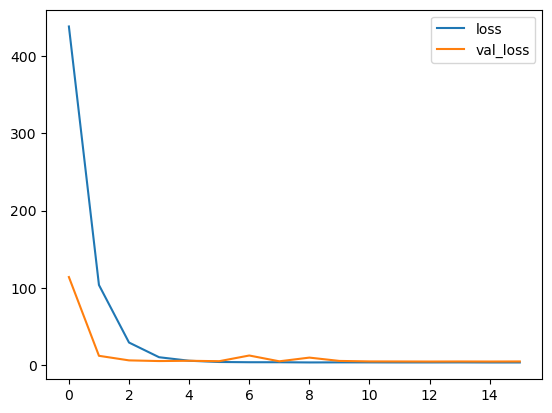

In [27]:
import matplotlib.pyplot as plt
d.plot()

In [28]:
first_eval=trainDF[-length:]


In [29]:
first_eval

,Temperature (C)
Date,
2024-07-02,30.091965
2024-07-03,29.997340
2024-07-04,30.031979
2024-07-05,29.846924
2024-07-06,30.088514
2024-07-07,29.991625
2024-07-08,30.074639
2024-07-09,29.901632
2024-07-10,30.047889


In [30]:
current_eval=first_eval.to_numpy().reshape((1,length,1))

In [31]:
current_eval

array([[[30.09196528],
        [29.99734028],
        [30.03197917],
        [29.84692361],
        [30.08851389],
        [29.991625  ],
        [30.07463889],
        [29.90163194],
        [30.04788889],
        [30.03481944],
        [30.03454167],
        [30.0875    ],
        [30.14376389],
        [29.97786111],
        [29.97065278],
        [30.10164583],
        [29.96322917],
        [29.84975   ],
        [30.00579861],
        [29.99190972],
        [29.93122222],
        [29.94678472],
        [29.94911806],
        [29.99234028],
        [30.04151389],
        [29.99636806],
        [30.02224306],
        [30.04519444],
        [30.18740972],
        [30.04215278]]])

In [42]:
validDF.to_numpy()[1]

array([30.06235417])

In [40]:
validDF.head(5)

,Temperature (C)
Date,
2024-08-01,30.066000
2024-08-02,30.062354
2024-08-03,29.984583
2024-08-04,29.955604
2024-08-05,30.040583


In [43]:
import numpy as np
test_pred=[]
for i in range(95):
    curr_pred=model.predict(current_eval)[0]
    test_pred.append(curr_pred)
    current_eval=np.append(current_eval[:,1:,:],[[validDF.to_numpy()[i]]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [45]:
validDF['predict2']=test_pred

In [50]:
validDF.tail(20)

,Temperature (C),predict2
Date,,
2024-10-15,30.067431,[29.918869]
2024-10-16,30.089347,[30.187239]
2024-10-17,30.051715,[30.241417]
2024-10-18,29.902694,[30.113825]
2024-10-19,29.979285,[29.888554]
2024-10-20,30.075319,[29.983107]
2024-10-21,29.976806,[30.206324]
2024-10-22,30.027403,[30.078102]
2024-10-23,30.013569,[30.041245]


In [51]:
validDF.head(20)

,Temperature (C),predict2
Date,,
2024-08-01,30.066000,[30.149378]
2024-08-02,30.062354,[30.074907]
2024-08-03,29.984583,[30.127472]
2024-08-04,29.955604,[30.050703]
2024-08-05,30.040583,[29.973322]
2024-08-06,29.952792,[30.10039]
2024-08-07,29.907819,[30.038168]
2024-08-08,30.097889,[29.912464]
2024-08-09,30.018306,[30.165987]


In [44]:
current_eval

array([[[29.98329167],
        [30.058375  ],
        [29.99774306],
        [29.93038889],
        [29.88575694],
        [29.93281944],
        [30.10590972],
        [30.11072222],
        [29.89670139],
        [29.96867361],
        [30.06743056],
        [30.08934722],
        [30.05171528],
        [29.90269444],
        [29.97928472],
        [30.07531944],
        [29.97680556],
        [30.02740278],
        [30.01356944],
        [30.03490972],
        [29.98445833],
        [30.05414583],
        [29.92615972],
        [30.03183333],
        [29.96413194],
        [30.01284722],
        [30.01510417],
        [13.24813889],
        [13.85175   ],
        [13.36345139]]])